## Analisis Perbandingan Kompleksitas Waktu Algoritma Iteratif dan Rekursif pada Pengolahan Data Kehadiran Karyawan

Nama Anggota kelompok:
1. Enggar Tri Rahmadhani (103132400007)
2. Rebeca Grace Catlia Wahyudi (103132400016)
3. Rimbhi Putri Aulia Azzahra (103132400018)






IMPORT LIBRARY

In [ ]:
import random
import time
import sys
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

PARAMETER EXPERIMEN

In [ ]:
sys.setrecursionlimit(10**7)

JUMLAH_HARI = 30
UKURAN_INPUT = [10, 50, 100, 200, 400, 800]
ULANGAN_WAKTU = 10

FUNGSI PEMBUATAN DATA ABSENSI

In [ ]:
# 0 = tidak hadir
# 1 = hadir
def generate_attendance(jumlah_karyawan, jumlah_hari):
    data = []
    for _ in range(jumlah_karyawan):
        hari = []
        for _ in range(jumlah_hari):
            hari.append(random.randint(0, 1))
        data.append(hari)
    return data

ALGORITMA ITERATIF

In [ ]:
# menghitung total kehadiran karyawan
def hitung_kehadiran_iteratif(data):
    total = 0
    for karyawan in data:
        for hari in karyawan:
            total += hari
    return total

ALGORITMA REKURSIF

In [ ]:
# menghitung total kehadiran per karyawan
def jumlah_hari_rekursif(data_karyawan, indeks):
    if indeks == 0:
        return data_karyawan[0]
    return data_karyawan[indeks] + jumlah_hari_rekursif(data_karyawan, indeks - 1)

In [ ]:
# menghitung total kehadiran seluruh karyawan
def hitung_kehadiran_rekursif(data, indeks_karyawan):
    if indeks_karyawan == 0:
        return jumlah_hari_rekursif(data[0], len(data[0]) - 1)
    return (
        jumlah_hari_rekursif(data[indeks_karyawan], len(data[indeks_karyawan]) - 1)
        + hitung_kehadiran_rekursif(data, indeks_karyawan - 1)
    )

PENGUJIAN RUNTIME

In [ ]:
hasil_pengujian = []

for n in UKURAN_INPUT:
    data = generate_attendance(n, JUMLAH_HARI)

    total_iteratif = 0
    total_rekursif = 0

    for _ in range(ULANGAN_WAKTU):
        start = time.time()
        hitung_kehadiran_iteratif(data)
        total_iteratif += time.time() - start

        start = time.time()
        hitung_kehadiran_rekursif(data, n - 1)
        total_rekursif += time.time() - start

    hasil_pengujian.append({
        "Ukuran Input (n)": n,
        "Waktu Iteratif (detik)": total_iteratif / ULANGAN_WAKTU,
        "Waktu Rekursif (detik)": total_rekursif / ULANGAN_WAKTU
    })

TABEL HASIL PENGUJIAN RUNTIME


In [ ]:
tabel_hasil = pd.DataFrame(hasil_pengujian)

print("\nTABEL HASIL PENGUJIAN RUNTIME\n")
print(tabulate( tabel_hasil, headers="keys", tablefmt="grid", showindex=False))


TABEL HASIL PENGUJIAN RUNTIME

+--------------------+--------------------------+--------------------------+
|   Ukuran Input (n) |   Waktu Iteratif (detik) |   Waktu Rekursif (detik) |
+====================+==========================+==========================+
|                 10 |              1.1301e-05  |              3.80993e-05 |
+--------------------+--------------------------+--------------------------+
|                 50 |              7.03573e-05 |              0.000191712 |
+--------------------+--------------------------+--------------------------+
|                100 |              0.000212502 |              0.000837111 |
+--------------------+--------------------------+--------------------------+
|                200 |              0.000349116 |              0.00148485  |
+--------------------+--------------------------+--------------------------+
|                400 |              0.000720024 |              0.00272772  |
+--------------------+----------------------

GRAFIK PERBANDINGAN

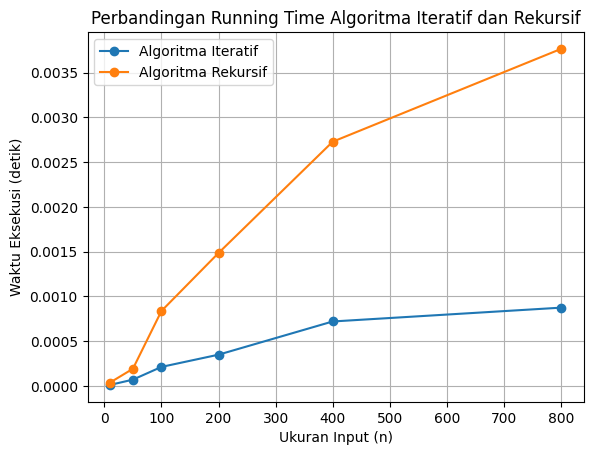

In [ ]:
plt.figure()
plt.plot(
    tabel_hasil["Ukuran Input (n)"],
    tabel_hasil["Waktu Iteratif (detik)"],
    marker="o",
    label="Algoritma Iteratif"
)
plt.plot(
    tabel_hasil["Ukuran Input (n)"],
    tabel_hasil["Waktu Rekursif (detik)"],
    marker="o",
    label="Algoritma Rekursif"
)

plt.xlabel("Ukuran Input (n)")
plt.ylabel("Waktu Eksekusi (detik)")
plt.title("Perbandingan Running Time Algoritma Iteratif dan Rekursif")
plt.legend()
plt.grid(True)
plt.show()

## Kesimpulan Analisis Perbandingan Algoritma Iteratif dan Rekrusif

berdasarkan hasil pengujian runtime, algoritma iteratif dan rekursif sama-sama memiliki kompleksitas waktu O(n x m). Namun, algoritma iteratif memiliki waktu eksekusi yang lebih cepat di bandingakan algoritma rekursif. Hal ini disebabkan oleh adanya overhead pemanggilan fungsi pada algoritma rekursif. Oleh karena itum algoritma iteratif lebih efisien dan lebih sesuai digunakan untuk pengolahan data dalam jumlah besar.